# test the spec Augmentation

In [28]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sys

from scipy.io.wavfile import read, write

length of f:129 length of t:295
295
129


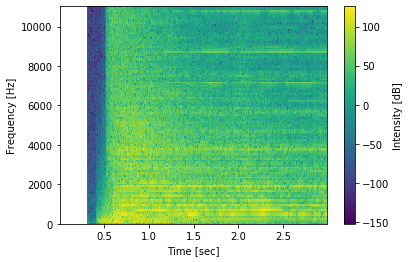

In [29]:
wav1_path = "./wav1.wav"
wav2_path = "./wav2.wav"

fs, data = read(wav1_path)

#スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(data, fs)


print(f"length of f:{len(f)} length of t:{len(t)}")
print(len(Sxx[0]))
print(len(Sxx))

#図の描画
with np.errstate(divide='ignore'):
    plt.pcolormesh(t, f, 10*np.log(Sxx)) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()

# ESPnet標準の特徴量抽出を使ってみる

標準の特徴量抽出(STFT)が本当に動くか確かめる

In [30]:
from espnet2.asr.frontend.default import DefaultFrontend
import torch

frontend = DefaultFrontend()

speech =torch.tensor([data], dtype = torch.float32) 
speech_length = torch.tensor([len(data)], dtype = torch.int64) 

feats, feats_lens = frontend.forward(speech, speech_length)

feats_list = feats.tolist()

print(feats.size(), feats_lens)

torch.Size([1, 517, 80]) tensor([517])


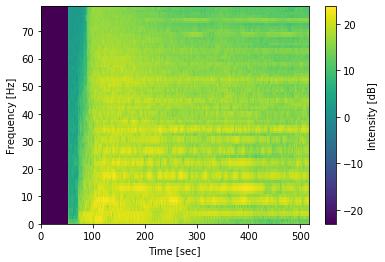

In [38]:

Sxx = np.array(feats_list[0]).T.tolist()

y = list(range(len(Sxx)))
x = list(range(len(Sxx[0])))


plt.pcolormesh(x,y, Sxx) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()

# Spec Augmentation

tensor([[[-23.0259, -23.0259, -23.0259,  ..., -23.0259, -23.0259, -23.0259],
         [-23.0258, -23.0258, -23.0258,  ..., -23.0258, -23.0258, -23.0258],
         [-23.0258, -23.0258, -23.0258,  ..., -23.0258, -23.0258, -23.0258],
         ...,
         [ 12.5799,  13.4051,  15.3388,  ...,  11.1068,  11.4413,  14.2732],
         [ 14.2441,  13.7493,  15.6628,  ...,  10.7084,  11.1861,  14.4606],
         [ 14.8293,  14.9187,  16.4095,  ...,  11.1683,  10.6621,  13.9827]]]) tensor([517])


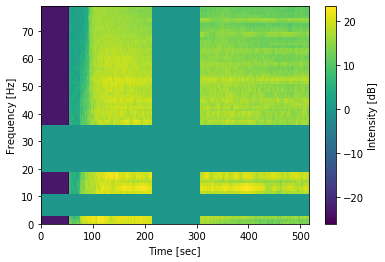

In [39]:
from espnet2.asr.specaug.specaug import SpecAug


specaug = SpecAug(
            apply_time_warp=True,
            apply_freq_mask=True,
            apply_time_mask=True,
            time_mask_width_range=(0,100),
)
feats, feats_lens = specaug.forward(feats, feats_lens)

feats_list = feats.tolist()

print(feats, feats_lens)

Sxx = np.array(feats_list[0]).T.tolist()

y = list(range(len(Sxx)))
x = list(range(len(Sxx[0])))


plt.pcolormesh(x,y, Sxx) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()

# 確認完了